# Step 1: Data Preparation

In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [4]:
advertising_df=pd.read_csv(r"C:\Users\user\Desktop\Neuural network\Advertising_2023.csv")

In [5]:
advertising_df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 47.0 KB


In [7]:
### Get summary of statistics of the data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [8]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

In [9]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Exploratory Data Analysis (EDA)

<Axes: >

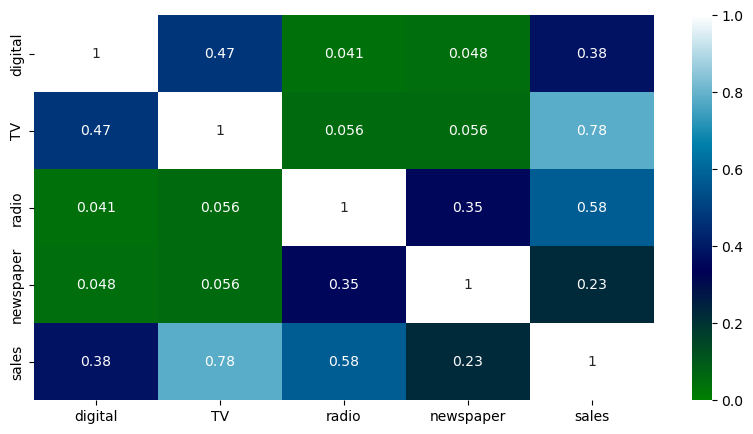

In [10]:
## Plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5)) ##creates a new figure with a specified size of 10 inches in width and 5 inches in height
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

#how sales corelates with the other four features.

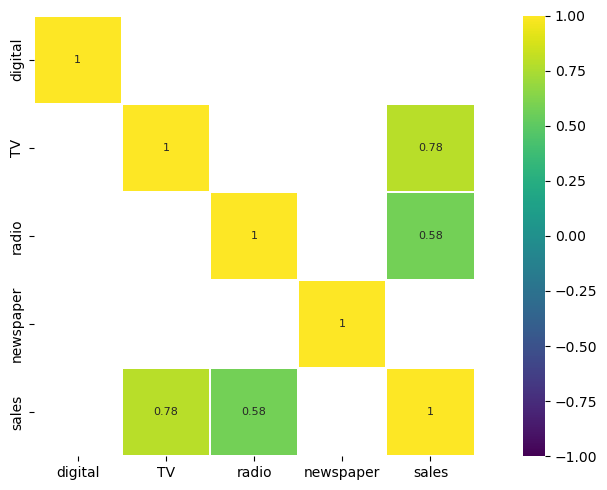

None

In [11]:
#create a correlation matrix

corr = advertising_df.corr() #calculates the correlation matrix of the DataFrame advertising_df and assigns it to variable corr.

plt.figure(figsize=(10, 5)) ##creates a new figure with a specified size of 10 inches in width and 5 inches in height

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)], # selects only those elements in the correlation matrix that have a correlation coefficient greater than or equal to 0.5 or less than or equal to -0.7. 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())


## shows the two two features that have a relationship with sales i.e tv and radio

In [12]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

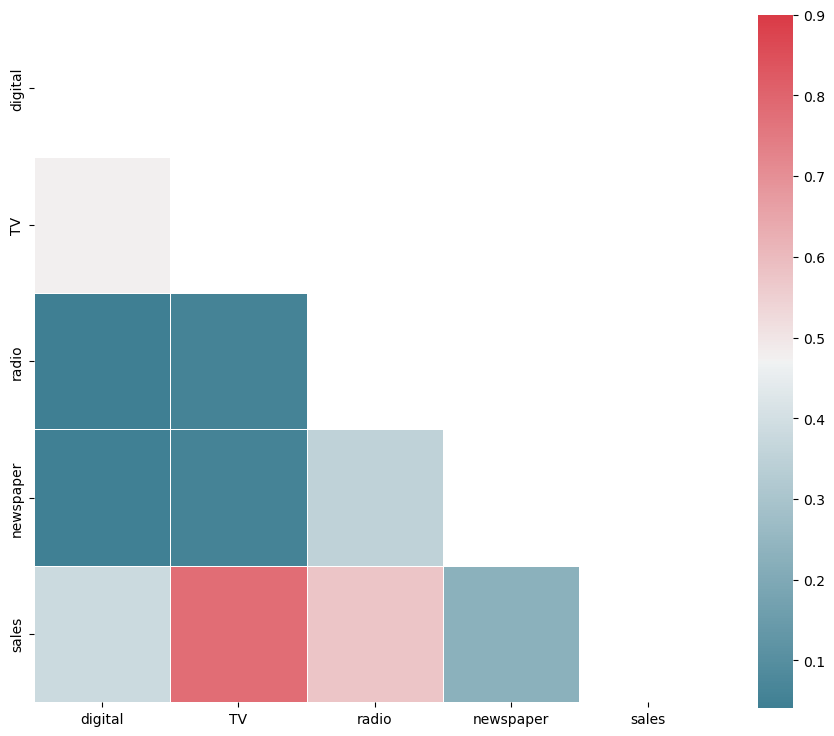

In [13]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

# showing how each chanel impact sales using gradnet colour schmes


In [14]:
corr

#same data in table form

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


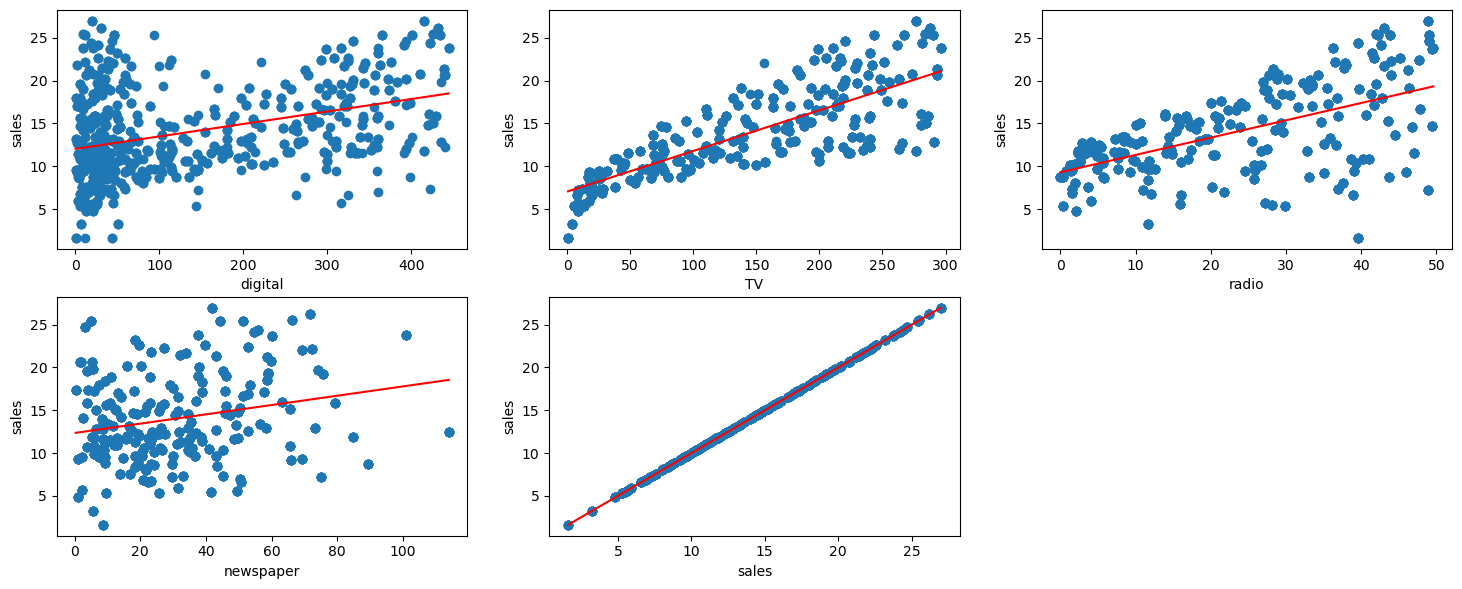

In [15]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

# Training a Linear Regression Model

In [16]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [17]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

In [18]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2 Build Network

In [20]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)


Epoch 1/32


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 235.5510 - mse: 235.6947 - val_loss: 235.3970 - val_mse: 235.3970
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 226.4536 - mse: 226.3431 - val_loss: 233.0410 - val_mse: 233.0410
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 225.2840 - mse: 225.3384 - val_loss: 231.2943 - val_mse: 231.2943
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232.1220 - mse: 232.1359 - val_loss: 229.9595 - val_mse: 229.9595
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213.0772 - mse: 213.1082 - val_loss: 228.9792 - val_mse: 228.9792
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214.6362 - mse: 214.6829 - val_loss: 227.9425 - val_mse: 227.9425
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221.0599 - mse: 221.1047 - val_loss: 227.0787 - val_mse: 227.0787
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213.8622 - mse: 213.8744 - val_loss: 226.3134 - val_mse: 226.3134
Epoch 9/32
23/23 ━━

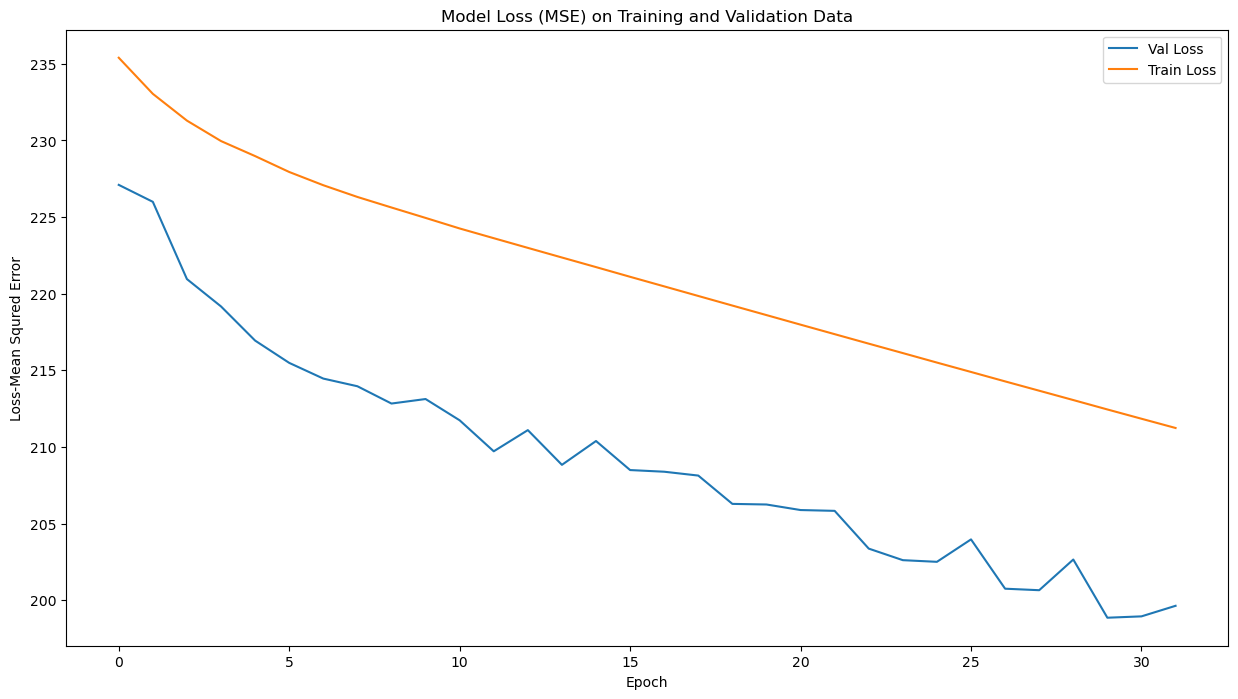

In [21]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()


# Manula Hyperparameter tuning


In [23]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(4,activation = 'relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 100)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 481.9523 - mse: 482.5218 - val_loss: 95.5455 - val_mse: 95.5455
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.8979 - mse: 79.9371 - val_loss: 54.1265 - val_mse: 54.1265
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.9806 - mse: 48.9950 - val_loss: 38.7476 - val_mse: 38.7476
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.5060 - mse: 37.5052 - val_loss: 35.0850 - val_mse: 35.0850
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.7548 - mse: 32.7553 - val_loss: 32.9198 - val_mse: 32.9198
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.6209 - mse: 31.6344 - val_loss: 31.1766 - val_mse: 31.1766
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.2016 - mse: 27.2063 - val_loss: 28.8739 - val_mse: 28.8739
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.3227 - mse: 26.3279 - val_loss: 25.7029 - val_mse: 25.7029
Epoch 9/100
23/23 ━━━━━━━━━━━━

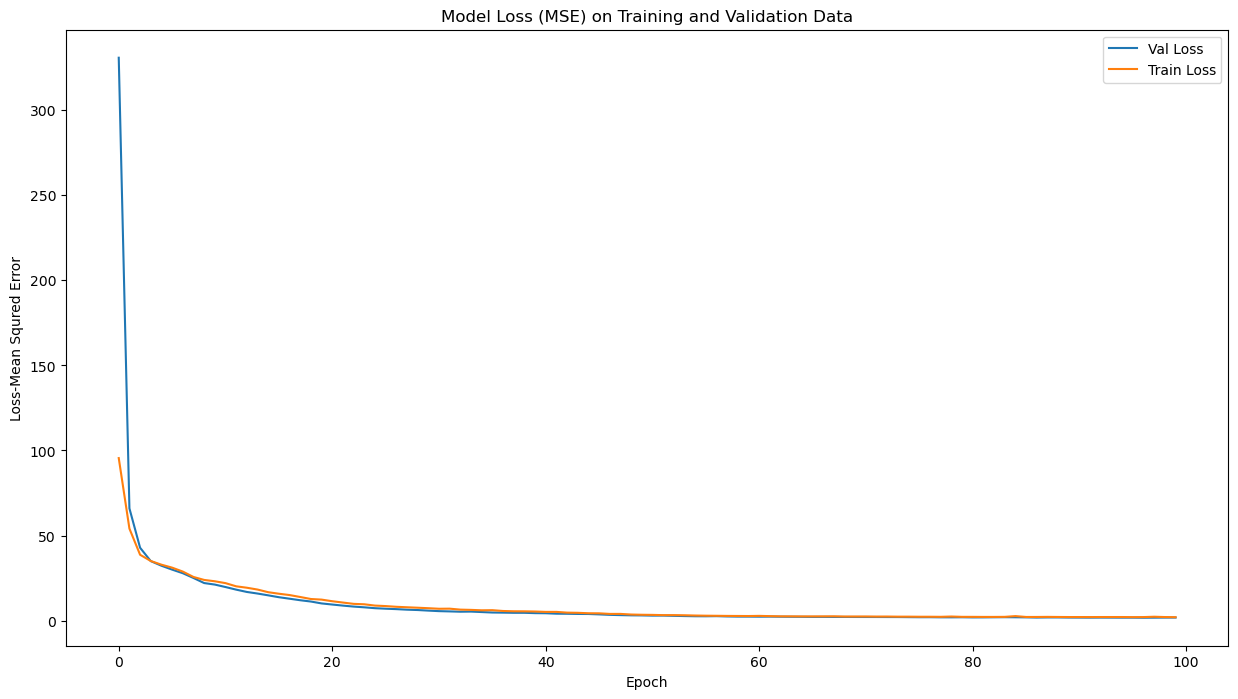

In [24]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

